In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile


pluto = pd.read_csv("./Pluto.csv")
pluto.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area
0,MN,2082,60,109,237.0,1001,6,7,10031,L034,...,10710,NaN,0,NaN,1,NaN,NaN,18v2,306.398917,5263.377629
1,MN,1665,45,111,188.0,3001,4,8,10029,L026,...,10604,NaN,0,NaN,1,NaN,NaN,18v2,325.305859,5424.268858
2,MN,1069,24,104,117.0,1014,2,3,10018,E034,...,10405,E-137,0,NaN,1,NaN,NaN,18v2,660.328403,25863.322060
3,MN,1069,136,104,117.0,1014,2,3,10036,E034,...,10405,E-137,1010690136,01/09/2013,1,NaN,NaN,18v2,219.815914,2461.845454
4,MN,1230,23,107,171.0,2001,3,6,10024,E074,...,10409,NaN,0,NaN,1,NaN,NaN,18v2,307.178441,5180.028739


[1945.0, 18049.20000000001] 7
[1514.0, 11015.0] 8
[1983.2, 17690.4] 3
[1845.0, 12405.0] 6
[1978.3, 18121.700000000015] 4
[1912.8, 18329.700000000004] 2
[1655.0, 13528.0] 9
[1645.0, 11200.000000000004] 1
[2215.4, 22555.0] 10
[1447.0, 20433.0] 5


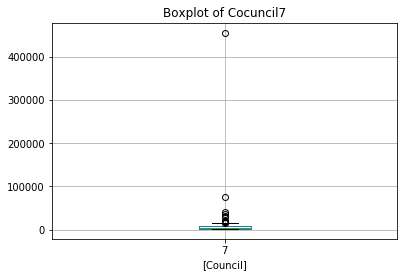

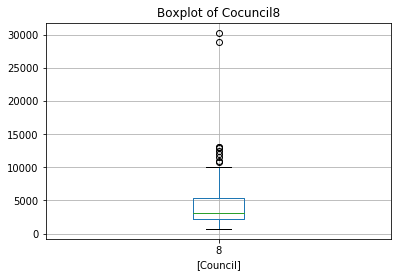

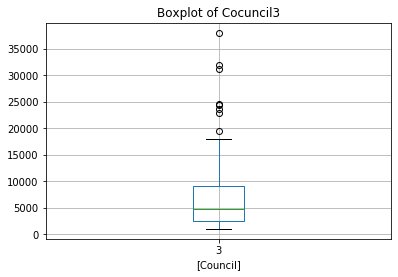

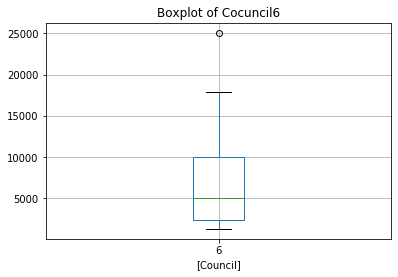

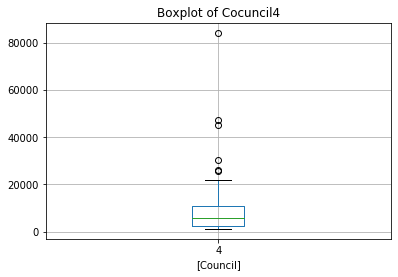

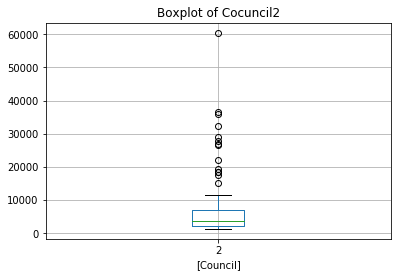

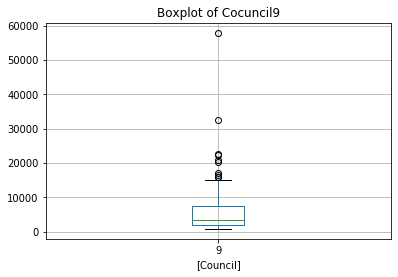

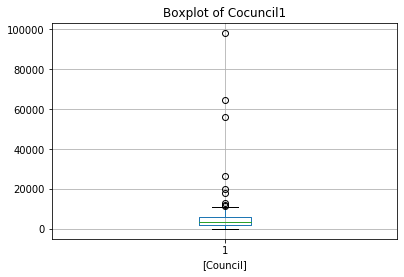

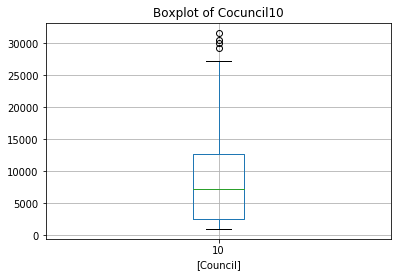

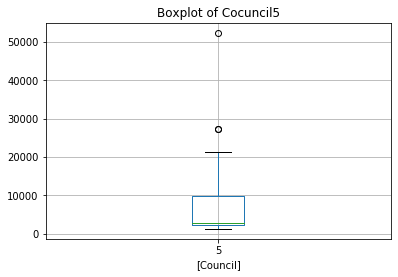

In [65]:
summary = {}

for i in pluto['Council'].unique():
    df = pluto[pluto["Council"] == i]
    lotarea = pluto[pluto["Council"] == i]["LotArea"]
    quartiles = percentile(lotarea, [10, 90])
    mean = df["LotArea"].mean()
    std = df["LotArea"].std()
    outliners = [quartiles[0],quartiles[1]]
    df.boxplot(column = ['LotArea'], by = ['Council'])
    plt.title("Boxplot of Cocuncil" + str(i))
    plt.suptitle("")
    print(outliners, i)
    filtered = pluto[(pluto["Council"] == i) & (pluto["LotArea"] > outliners[1])| (pluto["LotArea"] < outliners[0])]
    summary[i] = filtered

In [66]:
summary[7]

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area
8,MN,406,29,103,34.0,1001,1,2,10009,L011,...,10203,E-216,0,NaN,1,NaN,NaN,18v2,213.251645,2160.528812
11,MN,1723,64,110,200.0,2000,5,9,10027,L014,...,10607,NaN,0,NaN,1,NaN,NaN,18v2,229.563782,1380.492854
18,MN,1917,26,110,226.0,1002,5,9,10027,E059,...,10704,NaN,0,NaN,1,NaN,NaN,18v2,239.206309,1837.645365
23,MN,1723,164,110,200.0,2000,5,9,10027,L014,...,10607,NaN,0,NaN,1,NaN,NaN,18v2,224.817610,1140.367680
37,MN,1917,53,110,226.0,1001,5,9,10030,E059,...,10704,NaN,1019170053,01/05/1994,1,NaN,NaN,18v2,253.096287,2524.139255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,MN,1665,8,111,188.0,3001,4,8,10029,L026,...,10604,NaN,0,NaN,1,NaN,NaN,18v2,243.793313,1885.681443
902,MN,1770,79,111,196.0,2000,4,8,10035,L014,...,10609,NaN,0,NaN,1,NaN,NaN,18v2,124.374057,719.556403
904,MN,445,2,103,38.0,4000,1,2,10003,E028,...,10205,E-216,0,NaN,1,NaN,NaN,18v2,176.623557,1614.713419
906,MN,1665,39,111,188.0,3001,4,8,10029,L026,...,10604,NaN,0,NaN,1,NaN,NaN,18v2,247.358013,2052.131474


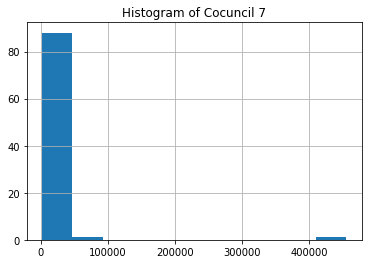

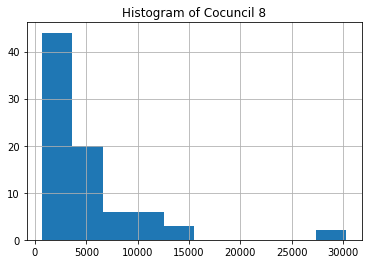

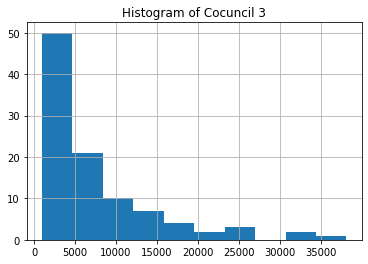

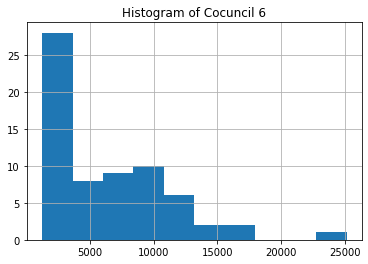

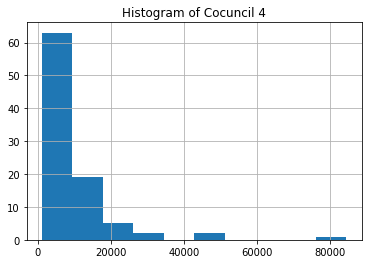

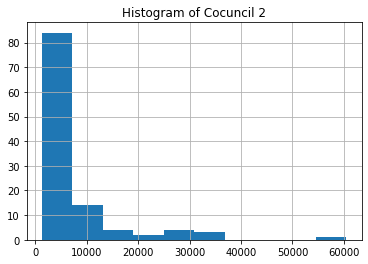

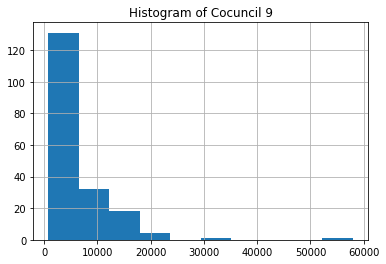

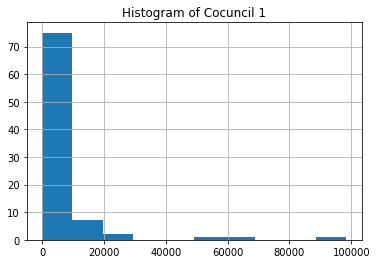

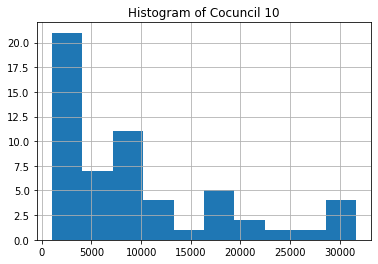

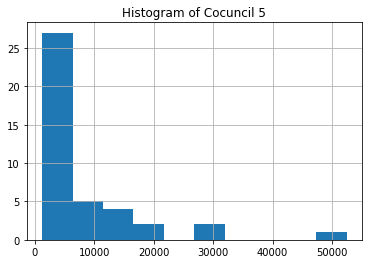

In [84]:
for i in pluto['Council'].unique():
    df = pluto[pluto["Council"] == i]
    lotarea = pluto[pluto["Council"] == i]["LotArea"]
    quartiles = percentile(lotarea, [10, 90])
    mean = df["LotArea"].mean()
    std = df["LotArea"].std()
    outliners = [quartiles[0],quartiles[1]]
    
    df.hist('LotArea')
    plt.title("Histogram of Cocuncil " + str(i))
    plt.show()
    filtered = pluto[(pluto["Council"] == i) & (pluto["LotArea"] > outliners[1])| (pluto["LotArea"] < outliners[0])]
    summary[i] = filtered
